# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [11]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [12]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [14]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [16]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [17]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [18]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [19]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [20]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [21]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [22]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [23]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [24]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [25]:
data.duplicated().sum()

71

In [26]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [27]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [28]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [29]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [30]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [31]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

__________________________


debt                              
         доля долнижков размер группы число должников
children                                             
0              0.075438         14091            1063
1              0.092346          4808             444
2              0.094542          2052             194
3              0.081818           330              27
4              0.097561            41               4
5              0.000000             9               0

<AxesSubplot:xlabel='children'>

<AxesSubplot:xlabel='children'>

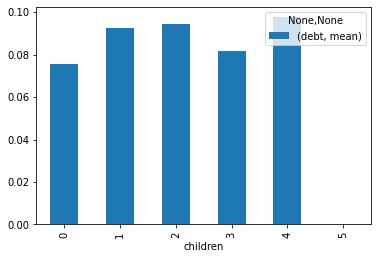

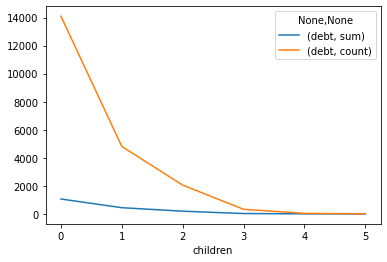

In [32]:
#выведем на экран значения показывающие отношение количества детей к количеству должников

#display(data.groupby('children').agg({'debt':['mean','count','sum']})) 


#исходя из полученных данных можно заключить, что количество должников с четырьмя и пятью детьми значительно меньше, что может повлиять на дальнейшие выводы
#уберем из расчета эти данные 

#data = data.loc[data['children'] != 4]
#data = data.loc[data['children'] != 5]

#разделительная полоса

print('__________________________')

#сгруппируем данные снова, а также создадим дополнительные переменные для дальнейшей визуализации

data_pivot = (data.groupby('children').agg({'debt':['mean','count','sum']}))
data_sum_count = (data.groupby('children').agg({'debt':['sum', 'count']}))
data_mean = (data.groupby('children').agg({'debt':['mean']}))

#переименуем столбцы для удобства 

data_pivot = data_pivot.rename(columns={'mean': 'доля долнижков', 'count': 'размер группы', 'sum': 'число должников'})
display(data_pivot)

#построим графики и визуализируем данные

display(data_mean.plot.bar())
display(data_sum_count.plot())

#import matplotlib.pyplot as plt
#plt.plot(x, y1, 'o-r')
#plt.plot(x, y2, 'o-.g')
#plt.legend(['L1', 'L2'])


Я пытался, но не смог. 

### **Вывод:** 

Исходя из проведенного анализа можно заключить, что зависимость между количеством детей и возвратом кредита в срок существует. 
Доля должников с детьми превышает долю должников без детей. 
Должники без детей - 7.5
Должники с одним ребенком - 9.2 (на 1.7 больше чем без детей)
Должники с двумя детьми - 9.5 (на 2 больше, чем без детей)

Исходя из полученных данных можно сделать вывод, что должники с детьми хуже справляются со своими финансовыми обязательствами. 
В таблице, а также в Графике 1 представлены данные выводы.
Оценка платежеспособности заемщиков с детьми при выдаче кредита может быть снижена.

Дополнительный анализ показал, что снижение количества заемщиков прямо пропорционально наличию детей (График 2), что может говорить о проблеме восприятия кредитов потенциальными заемщиками, как безопасного инструмента, а также о недоверии банковской системе Российской Федерации. 
Возможные решения по этому вопросу: 
1. Ориентирование на предложение кредитов потенциальным заемщикам без детей
2. Проведение кампаний по улучшению восприятия безопасности и стабильности кредитов заемщикам с детьми

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

debt                              
                      доля долнижков размер группы число должников
family_status                                                     
Не женат / не замужем       0.097639          2796             273
в разводе                   0.070648          1189              84
вдовец / вдова              0.066246           951              63
гражданский брак            0.093130          4134             385
женат / замужем             0.075606         12261             927

<AxesSubplot:xlabel='family_status'>

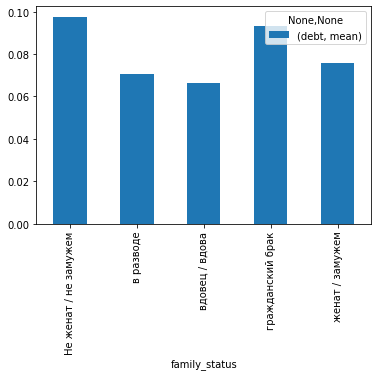

In [33]:

data_family = pd.DataFrame((data.groupby('family_status').agg({'debt':['mean','count','sum']})))
data_sum_count = (data.groupby('family_status').agg({'debt':['sum', 'count']}))
data_mean = (data.groupby('family_status').agg({'debt':['mean']}))


data_family = data_family.rename(columns={'mean': 'доля долнижков', 'count': 'размер группы', 'sum': 'число должников'})
#data_family = data_family.sort_values(by='доля долнижков')

display(data_family)

display(data_mean.plot.bar())


**Вывод:** Исходя из проведенного анализа можно заключить, что зависимость между семейным положением и возвратом кредита в срок существует. Лучше всего со своими финансовыми обязательствами справляются "Вдовцы или Вдовы" - 6.6%, это самая малочисленная категория и количественный разрыв в данных может влиять на достоверность результата анализа. 
Вторая категория по платежеспособности - заемщики в разводе - 7.1%. Третья категория, которая является самой многочисленной - заемщики в браке - 7.5%.
Отдельно хочу отметить категории "Гражданский брак" и "Не женат/Не замужем", 9.7% и 9.3% соответственно, что говорит о том, что эти категории хуже всего справляются с финансовыми обязательствами. Вероятно в эти группы входят заемщики с небольшим доходом, либо эту категорию наполняют молодые люди, которые еще не обрели финансовой стабильности. 



#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

debt                              
                    доля долнижков размер группы число должников
total_wage_category                                             
высокий доход             0.081601         16887            1378
низкий доход              0.080645           124              10
средний доход             0.079630          4320             344

<AxesSubplot:xlabel='total_wage_category'>

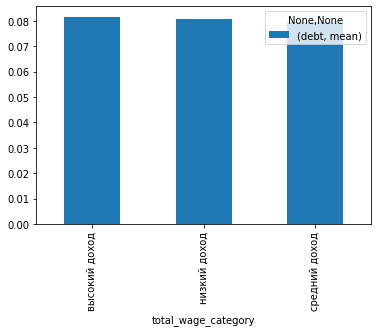

In [34]:
#категоризуем данные в Series 'total_income' и разобьем количество заемщиков на 3 подкатегории доходов

def total_wage(row):
    if row <= 40000:
        return 'низкий доход'
    if 40000 <= row <= 100000:
        return 'средний доход'
    if row > 100000:
        return 'высокий доход'
    
data['total_wage_category'] = data['total_income'].apply(total_wage) 
    


data_wage = pd.DataFrame((data.groupby('total_wage_category').agg({'debt':['mean','count','sum']})))
data_sum_count = (data.groupby('total_wage_category').agg({'debt':['sum', 'count']}))
data_mean = (data.groupby('total_wage_category').agg({'debt':['mean']}))


data_wage = data_wage.rename(columns={'mean': 'доля долнижков', 'count': 'размер группы', 'sum': 'число должников'})
#data_family = data_family.sort_values(by='доля долнижков')

display(data_wage)

display(data_mean.plot.bar())


**Вывод:** Исходя из проведенного анализа можно заключить, что уровень дохода категорий "средний доход" и "высокий доход" не влияет на возврат кредита в срок. Категория "низкий доход" не обладает достаточным количеством данных для проведения анализа и заключения надлежащего вывода.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

debt                              
                         доля долнижков размер группы число должников
purpose_category                                                     
операции с автомобилем         0.093480          4279             400
операции с недвижимостью       0.072551         10751             780
получение образования          0.092528          3988             369
проведение свадьбы             0.079118          2313             183

<AxesSubplot:xlabel='purpose_category'>

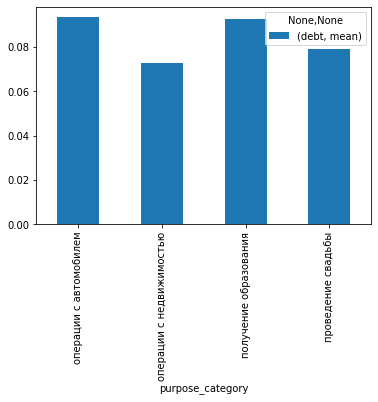

In [35]:
#используем в анализе данных Series "purpose_category", который мы добавляли в DataFrame 'data' ранее:

data_points = pd.DataFrame((data.groupby('purpose_category').agg({'debt':['mean','count','sum']})))
data_sum_count = (data.groupby('purpose_category').agg({'debt':['sum', 'count']}))
data_mean = (data.groupby('purpose_category').agg({'debt':['mean']}))


data_points = data_points.rename(columns={'mean': 'доля долнижков', 'count': 'размер группы', 'sum': 'число должников'})
#data_family = data_family.sort_values(by='доля долнижков')

display(data_points)

display(data_mean.plot.bar())

**Вывод:** В результате проведенно анализа из 4х категорий можно выделить 2 группы заемщиков по 2 подкатегории. Лучше всего возвращают кредит в срок подкатегории заемщиков, которые берут кредит для операций с недвижимостью(7.2%), а также подкатегория, использующая кредит для проведения свадьбы(7.9%). Из чего в первом случае можно заключить, что сумма кредита иметь значение и влияет на её возвратность, вероятнее также это связано с более серьезной банковской проверкой и гарантиями возврата кредита. Во втором случае можно сделать вывод, что кредит скорее всего погашается за счет средств родственников, которые на этих кредитных свадьбах отдыхали, так сказать, взяли кредит, провели свадьбу, денег надарили, кредит погасили. 
Вторая группа заемщиков это "Операции с автомобилем"(9.3%) и "Получение образования" (9.3%). "На автомобилях ездить это вам не кредит платить", "Берегись автомобиля"- вероятно именно с этими словами заходит в кабинет кредитный специалист Андрей. Его день начинается с чашечки кофе, а заканчивается разбором полетов с начальником "Почему Андрей, ты выдал так много невозвратных кредитов этим твоим автомобилистам?". Так то, Андрюша, если бы ты изучал Аналитику данных от курса Яндекс.Практикум, такого бы не случилось.  "Все данные выше получены в результате анализа и защищены." All rights reserved.(R) Вторая подкатегория "Получение образования" также не образец для подражания о сроках возврата кредитов. Берегись кредиторов, Яндекс.Практикум, судя по аналитике, они не очень надежные ребята, хорошие конечно, но не очень надежные.  


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

In [36]:
print(data.isna().sum())

children                 0
days_employed            0
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
total_income_category    0
purpose_category         0
total_wage_category      0
dtype: int64


Чтобы понять причину пропусков я вернулся к заданию 4 этого проекта. Пропуски есть в столбцах 'days_employed' и 'total_income', в каждом столбце пропусков одинаковое количество -  2174. Исходя из этого можно предположить, что вероятнее всего это не ошибка Человеческого фактора (опечатаетки в тексте, указание другого порядка величин, ошибка при вводе числа), а скорее Технологическая (возникают при копировании, считывании, смене формата). Логично предположить, что вероятность допущения пропуска в двух столбцах сразу, каждым из 2174 человек, крайне мала. 


Также вероятно, что пропуск в двух столбцах одновременно обусловлен зависимостью одного столбца от другого, при пропуске данных в одном столбце вызывает пропуск в другом.

Одна из гипотез, которую можно выдвинуть - это отсутствие у банка информации о работе и начислениях заемщиков. Так как в Российской Федерации очень много дееспособного и работающего населения, которое не трудоустроено официально, но все же имеющего доход, банк не может обнаружить данные о доходах и количестве трудовых дней заемщиков, а только парсит данные из официальных источников.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Если в выборке есть слишком высокие показатели, которые выбиваются из общего количества данных, их результаты сильно смещают значение среднего вверх. Вот почему оценивать предпочтения широкого круга потребителей лучше медианой. Она покажет именно среднее значение, без завышения среднего значения из за высоких показателей. 

### Шаг 4: общий вывод.

Был проведен анализ для выявления факторов влияющих на факт погашения кредита в срок. Для работы были взяты данные банка - статистика о платежеспособности клиентов.
Результаты исследования могут быть использованы банком для оценки способности потенциального заемщика вернуть кредит банку. 

Для проведения анализа были поставлены несколько гипотез: 

1. Количество детей играет роль и влияет на погашение кредита в срок
2. Семейное положение влияет на погашение кредита в срок
3. Уровень дохода влияет на погашение кредита в срок
4. Цель кредита влияет на погашение кредита в срок 

Полученные результаты:

Гипотеза 1. Частично подтверждена. Результаты достоверны только при выборке заемщиков без детей, с 1м ребенком и с 2мя детьми. 

Заемщики без детей - 7.5%. Заемщики с одним ребенком - 9.2% (на 1.7% больше чем без детей). Заемщики с двумя детьми - 9.5% (на 2% больше, чем без детей).
Исходя из полученных данных можно сделать вывод, что заемщики с детьми хуже справляются со своими финансовыми обязательствами, чем заемщики без детей.
Для проверки платежеспособности заемщиков с 3мя и более детьми необходимо больше данных.


Гипотеза 2. Подтверждена. 

- У неженатых клиентов (9.3%) и заемщики вне официального брака (9.7%) имеют больше шансов стать неблагонадежным заемщиком
- Категории "В разводе"(7.1%) или "Вдовец/Вдова"(6.6%), а также "Женат/Замужем"(7.5%.), менее вероятно становятся должниками


Гипотеза 3. Частично подтверждена. 

Исходя из проверки данной гипотезы можно заключить, что уровень дохода категорий "средний доход" и "высокий доход" не влияет на возврат кредита в срок. Категория "низкий доход" не обладает достаточным количеством данных для проведения анализа и заключения надлежащего вывода.


Гипотеза 4. Подтверждена. 


Лучше всего возвращают кредит в срок подкатегории заемщиков, которые берут кредит для операций с недвижимостью(7.2%), а также подкатегория, использующая кредит для проведения свадьбы(7.9%). Из чего в первом случае можно заключить, что сумма кредита иметь значение и влияет на её возвратность, вероятнее также это связано с более серьезной банковской проверкой и гарантиями возврата кредита. 

Во втором случае можно сделать вывод, что кредит скорее всего погашается за счет средств родственников, которые на этих кредитных свадьбах отдыхали, так сказать, взяли кредит, провели свадьбу, денег надарили, кредит погасили. Вторая группа заемщиков это "Операции с автомобилем"(9.3%) и "Получение образования" (9.3%). 

"На автомобилях ездить это вам не кредит платить", "Берегись автомобиля"- вероятно именно с этими словами заходит в кабинет кредитный специалист Андрей. Его день начинается с чашечки кофе, а заканчивается разбором полетов с начальником "Почему Андрей, ты выдал так много невозвратных кредитов этим твоим автомобилистам?". Так то, Андрюша, если бы ты изучал Аналитику данных от курса Яндекс.Практикум, такого бы не случилось. 
"Все данные выше получены в результате анализа и защищены." All rights reserved.(R) 

Вторая подкатегория "Получение образования" также не образец для подражания о сроках возврата кредитов. Берегись кредиторов, Яндекс.Практикум, судя по аналитике, они не очень надежные ребята, хорошие конечно, но не очень надежные.